In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

In [2]:
import json

with open('parameters.json') as json_file:
    data = json.load(json_file)
data

{'simset': {'@startDate': '15-12-2018', '@endDate': '20-05-2019'},
 'common': {'CO2dosing': {'@pureCO2cap': 150}},
 'comp1': {'setpoints': {'temp': {'@heatingTemp': 18,
    '@ventOffset': 2,
    '@radiationInfluence': '100 400 2',
    '@radiationInfluenceC': '100 400 0',
    '@PbandVent': '6 18; 20 4'},
   'ventilation': {'@startWnd': 30,
    '@winLeeMin': 0,
    '@winLeeMax': 100,
    '@winWndMin': 0,
    '@winWndMax': 100},
   'CO2': {'@setpoint': 500, '@setpIfLamps': 700, '@doseCapacity': 100}},
  'heatingpipes': {'pipe1': {'@maxTemp': 80,
    '@minTemp': 0,
    '@radiationInfluence': '100  400'}},
  'screens': {'scr1': {'@enabled': True,
    '@material': 'scr_OBSCURA_9950_FR.par',
    '@ToutMax': 15,
    '@closeBelow': 5,
    '@closeAbove': 1200,
    '@lightPollutionPrevention': True},
   'scr2': {'@enabled': True,
    '@material': 'scr_LUXOUS_1347_FR.par',
    '@ToutMax': 15,
    '@closeBelow': '0 290; 10 2',
    '@closeAbove': 1200,
    '@lightPollutionPrevention': False}},
  'il

In [4]:
from rlagent.schedule import Schedule
from rlagent.simulation import get_simulation_results
from datetime import date, timedelta

schedule = Schedule(start_date=date(2017, 12, 15), stop_date=date(2018, 3, 1), first_set_date=date(2018, 2, 1), last_set_date=date(2018, 2, 7))

In [6]:
t = [24] * 6 * 8
l = [16] * 6 
output = get_simulation_results(t, l, schedule)

In [21]:
import pandas as pd
import numpy as np

data = pd.DataFrame({'harvest': np.array(output['harvest']) * 100, 'load': output['plant_load']})

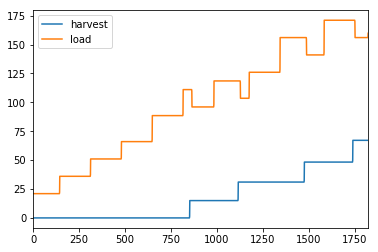

In [22]:
import matplotlib.pyplot as plt
data.plot()
plt.show()